## 01 Setup:

01.1 Keras and Tensorflow.

In [2]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
from keras import models
from keras import layers
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

Using plaidml.keras.backend backend.


01.2 Load Data (with Built-in Keras Functions)

In [3]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

* play with dataset

In [4]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
x_train[0].shape

(32, 32, 3)

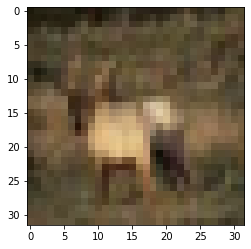

In [15]:
plt.imshow(x_train[3])

In [7]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [8]:
y_train[0]

array([6], dtype=uint8)

* convert the dataset (to matrices, and normalize)

In [9]:
num_classes = 10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train /= 255
x_test /= 255

# 02 Define the Model

In [10]:
model = models.Sequential([
            layers.Conv2D(32, (3, 3), 
                          padding='same', 
                          activation='relu', 
                          input_shape=x_train.shape[1:]),
            layers.Conv2D(32, (3, 3),
                          activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.25),
            layers.Conv2D(64, (3, 3), 
                          padding='same',
                          activation='relu'),
            layers.Conv2D(64, (3, 3),
                          activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.25),
            layers.Flatten(),
            layers.Dense(512, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(10,activation='softmax')
])

INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


In [11]:
optimizer = keras.optimizers.RMSprop(lr = 0.0001, decay=1e-6)

model.compile(loss = 'categorical_crossentropy',
             optimizer = optimizer,
             metrics = ['accuracy'])

# 03 Define Hyper-Parameters & Train

In [12]:
batch_size = 256
epochs = 4

import time, math
start_time = time.time()

model.fit(x = x_train, 
          y = y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_data = (x_test,y_test),
          shuffle = True
         )

end_time = time.time()
spent_time = int(end_time - start_time)

ss = spent_time % 60
mm = int(spent_time / 60)

hh = int(mm / 60)
mm = mm % 60
print("training is done, and has spent {} : {} : {}".format(hh,mm,ss))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
17408/50000 [=========>....................] - ETA: 53s - loss: 2.2348 - acc: 0.1623

KeyboardInterrupt: 

* training is done, and has spent 2 : 3 : 57

In [ ]:
model_name = "week05_06_cifar10-cnn.h5"
model.save(model_name)

04 Evaluate the Trained Model

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])